In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [7]:
df.shape

(27, 2)

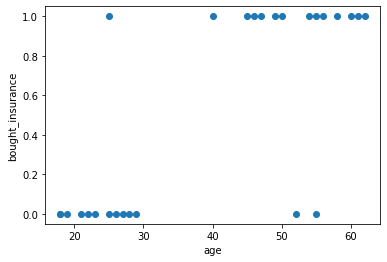

In [9]:
plt.scatter(df['age'], df['bought_insurance'])
plt.xlabel('age')
plt.ylabel('bought_insurance')
plt.show()

split dataframe into training set and test set 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df['bought_insurance'], test_size = 0.1)

In [32]:
X_test

,age
7,60
2,47
26,23


In [33]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [34]:
reg.fit(X_train, y_train)

LogisticRegression()

In [35]:
reg.score(X_test, y_test)

1.0

In [36]:
reg.predict(X_test)

array([1, 1, 0], dtype=int64)

In [37]:
reg.predict_proba(X_test)

array([[0.06892248, 0.93107752],
       [0.27602542, 0.72397458],
       [0.88713069, 0.11286931]])

In [40]:
reg.predict([[22]])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Excercise

In [42]:
dd = pd.read_csv('HR_comma_sep.csv')
dd.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [47]:
dd.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

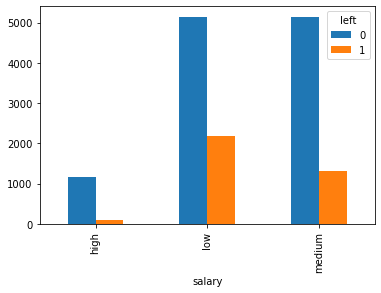

In [49]:
pd.crosstab(dd.salary,dd.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

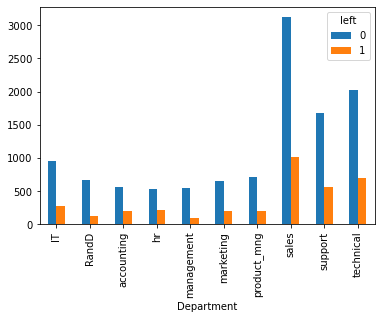

In [51]:
pd.crosstab(dd.Department, dd.left).plot(kind= 'bar')

In [52]:
subdf = dd[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]

In [54]:
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [61]:
dummies = pd.get_dummies(subdf.salary)
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [62]:
concatenated = pd.concat([subdf, dummies], axis = 'columns')
concatenated

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [64]:
final = concatenated.drop(['salary', 'medium'], axis = 'columns')
final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [65]:
X1_train, X1_test, y1_train, y1_test = train_test_split(final[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'high', 'low']], dd['left'], test_size = 0.2)

In [66]:
X1_train

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
644,0.58,238,0,0,1
13254,0.61,153,0,0,1
11605,0.89,179,0,1,0
10755,0.29,183,0,0,1
9859,0.72,243,0,0,1
...,...,...,...,...,...
12312,0.40,139,0,0,1
5228,0.27,239,0,0,1
2447,0.48,201,0,0,0
2120,0.67,182,0,0,1


In [67]:
y1_train

644      1
13254    0
11605    0
10755    0
9859     0
        ..
12312    1
5228     0
2447     0
2120     0
7817     0
Name: left, Length: 11999, dtype: int64

In [68]:
reg2 = LogisticRegression()

In [69]:
reg2.fit(X1_train, y1_train)

LogisticRegression()

In [70]:
reg2.predict(X1_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
reg2.score(X1_test, y1_test)

0.785